         3         2
-0.3943 x + 1.189 x + 0.0504 x + 0.08531


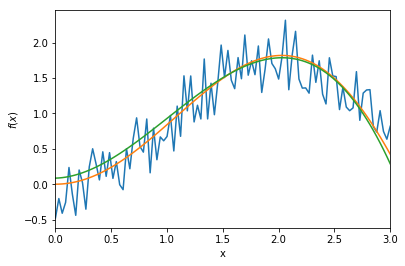

In [1]:

# Author: Daniel Schacher
# for HW5 of phys 300

import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline
import mpld3
mpld3.enable_notebook()


f = lambda x: x * np.sin(x)  

#define the paramters for the plot
a,b = 0,3
npoints = 100
x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5

# lets try and fit the data to a polynomial and then take the derivative of that polynomial
# numpy provides functions to do just that
fit = np.polyfit(x,y ,3)
fit = np.poly1d(fit)
dy = np.polyder(fit)
print(fit)


# now we can plot the fit to get an idea of how good it is 

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5
plt.figure(2)
plt.plot(x,y, label = 'actual function')
plt.plot(x,f(x))
plt.plot(x, fit(x), label = 'fit' )

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.show()


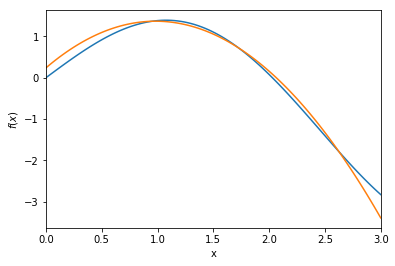

r2    0.984231
m     1.067220
b    -0.036246
dtype: float64


In [2]:
# now to see if taking the derivitve of the polynomial is a good aproximation of the derivative of the actual function we'll do a linear regression

regdf = pd.DataFrame(columns = ['r2','m','b'])
lm = LinearRegression()

# the drivative of xsin(x) is sin(x) + xcos(x) so we will compair this to the derivative of our fitted polynomial
df = lambda x: np.sin(x) + x * np.cos(x)

# We'll do 100 trials and take an average of the R^2 value to evalute the goodness of the fit
for trial in range(1, 100):
    
    x = np.linspace(a,b,npoints)
    y = f(x) + np.random.rand(npoints) - 0.5
    fit = np.polyfit(x,y ,3)
    fit = np.poly1d(fit)
    dy = np.polyder(fit)

    actual_Function = df(x)
    fitted_Function = dy(x)
    lm.fit(actual_Function.reshape(-1, 1) , fitted_Function)
    regdf.loc[trial , 'r2'] = lm.score(actual_Function.reshape(-1, 1) , fitted_Function)
    regdf.loc[trial , 'm']= lm.coef_[0]
    regdf.loc[trial , 'b'] = lm.intercept_

plt.figure(3)
plt.plot(x,df(x), label = 'actual derivative')
plt.plot(x,dy(x), label = 'fit derivative')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.show()

#  We can see how good the fit is by looking at the average R^2 
print(regdf.mean())




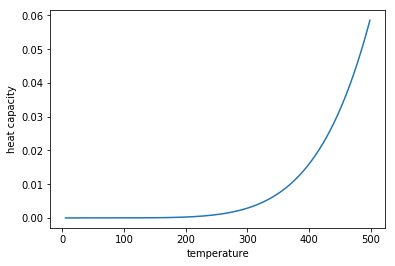

In [4]:

# Heat capacity of a solid using Debye theory of solids 
# Hear capacity of aluminium

V = .001 # volume
k = 1.38064852 * 10**-23 # Boltzmann constant
theta = 428 # Debey temp for aluminum
p = 6.022 * 10 ** 23 # number of molecules

f = lambda x: (x**4) * np.exp(x) / (np.exp(x) - 1)** 2
g = lambda t: 9 * V * p * k * (t / theta)**3
y = []
for t in range(5, 500):
    h = integrate.quad(f, 0, t/theta)
    Cv = g(t) * h[0] # quad returns tuple of area and error. We just want the area
    y.append(Cv)  # append data to list

x = range(5, 500)

plt.xlabel('temperature')
plt.ylabel('heat capacity')
plt.plot(x,y)